In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [4]:
Naples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 11027 non-null  object 
 1   name                         11027 non-null  object 
 2   description                  11027 non-null  object 
 3   neighborhood_overview        11027 non-null  object 
 4   picture_url                  11027 non-null  object 
 5   host_name                    11027 non-null  object 
 6   host_since                   11027 non-null  object 
 7   host_about                   11027 non-null  object 
 8   host_response_time           11027 non-null  object 
 9   host_is_superhost            11027 non-null  object 
 10  host_verifications           11027 non-null  object 
 11  host_has_profile_pic         11027 non-null  object 
 12  host_identity_verified       11027 non-null  object 
 13  neighbourhood   

In [47]:
print(Naples["instant_bookable"].unique())

[0 1]


In [35]:
Naples["property_type"] = Naples["property_type"].replace({
    "Private room in bed and breakfast": 1,
    "Private room in condo": 2,
    "Entire rental unit": 3,
    "Private room in rental unit": 4,
    "Entire loft": 5,
    "Entire cottage": 6,
    "Entire home": 7,
    "Room in bed and breakfast": 8,
    "Entire condo": 9,
    "Shared room in hostel": 10,
    "Room in boutique hotel": 11,
    "Entire vacation home": 12,
    "Entire villa": 13,
    "Private room in home": 14,
    "Entire serviced apartment": 15,
    "Entire townhouse": 16,
    "Private room in hostel": 17,
    "Private room": 18,
    "Entire bed and breakfast": 19,
    "Private room in villa": 20,
    "Entire guesthouse": 21,
    "Room in hostel": 22,
    "Boat": 23,
    "Tiny home": 24,
    "Dome": 25,
    "Room in hotel": 26,
    "Shared room in bed and breakfast": 27,
    "Entire guest suite": 28,
    "Room in serviced apartment": 29,
    "Private room in vacation home": 30,
    "Shared room in rental unit": 31,
    "Shared room in condo": 32,
    "Private room in serviced apartment": 33,
    "Entire place": 34,
    "Private room in guest suite": 35,
    "Private room in tiny home": 36,
    "Private room in townhouse": 37,
    "Private room in boat": 38,
    "Private room in loft": 39,
    "Earthen home": 40,
    "Dammuso": 41,
    "Shared room in home": 42,
    "Houseboat": 43,
    "Private room in guesthouse": 44,
    "Private room in casa particular": 45,
    "Camper/RV": 46,
    "Castle": 47,
    "Casa particular": 48,
    "Entire home/apt": 49,
    "Farm stay": 50,
    "Private room in farm stay": 51,
    "Room in aparthotel": 52,
    "Tent": 53
})

C:\Users\Bondleton\AppData\Local\Temp\ipykernel_22736\3994576288.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["property_type"] = Naples["property_type"].replace({


In [43]:
Naples["host_identity_verified"] = Naples["host_identity_verified"].replace({"t": 1, "f": 0})

C:\Users\Bondleton\AppData\Local\Temp\ipykernel_22736\900673866.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["host_identity_verified"] = Naples["host_identity_verified"].replace({"t": 1, "f": 0})


In [46]:
Naples["instant_bookable"] = Naples["instant_bookable"].replace({"t": 1, "f": 0})

C:\Users\Bondleton\AppData\Local\Temp\ipykernel_22736\3824182154.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["instant_bookable"] = Naples["instant_bookable"].replace({"t": 1, "f": 0})


In [37]:
Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({"t": 1, "f": 0})
Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({"Sin especificar": 0})

C:\Users\Bondleton\AppData\Local\Temp\ipykernel_22736\3740507224.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({"Sin especificar": 0})


In [7]:
print(Naples["availability_60"].unique())

[59 58 26 30 28  0  5 17 57 40 12 52 11 60 16 34  8 47 19 21 15 44 18  1
 41 49 27 42 36 56  6 54 48 13 24 53 14 51 31 22 23 33  9 43 39  3 38 55
 50 25 29 10 20 46 35 45  2  4 32 37  7]


1. id

<Axes: xlabel='review_scores_communication', ylabel='id'>

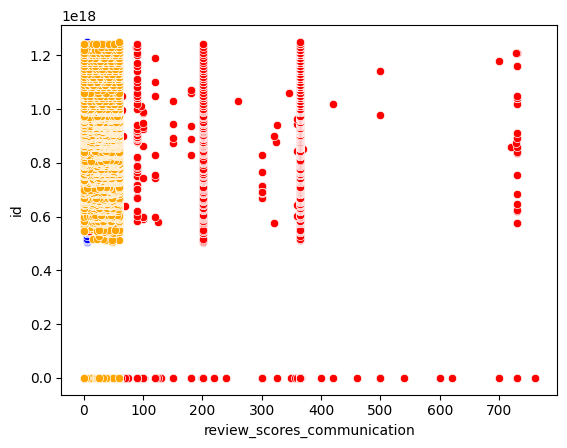

In [8]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='id', color="blue", data=Naples)
sns.scatterplot(x='maximum_nights', y='id', color="red", data=Naples)
sns.scatterplot(x='availability_60', y='id', color="orange", data=Naples)

In [9]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples[['review_scores_communication', 'maximum_nights','availability_60']]
Var_Dep= Naples['id']

In [10]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication', 'maximum_nights', 'availability_60'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.47049931e+18, 8.11347158e+14, 3.66867902e+15]),
 'rank_': 3,
 'singular_': array([1.63661748e+04, 1.90168203e+03, 7.31839238e+00]),
 'intercept_': -6.982350258829224e+18}

Modelo matematico y = 1.47049931e+18 + 8.11347158e+14 + 3.66867902e+15 + (-6.982350258829224e+18)

In [11]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15356011856674168

In [12]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples[['review_scores_communication', 'maximum_nights', 'availability_60']])
y_pred

array([7.32640824e+17, 2.87428903e+17, 3.66920611e+17, ...,
       5.79966624e+17, 8.82740048e+17, 8.86408727e+17])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Naples.insert(24, 'Predicciones', y_pred)
Naples

<Axes: xlabel='maximum_nights', ylabel='id'>

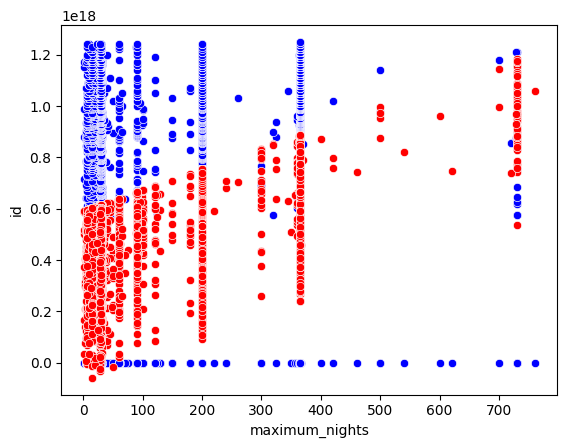

In [23]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='maximum_nights', y='id', color="blue", data=Naples)
sns.scatterplot(x='maximum_nights', y='Predicciones', color="red", data=Naples)
# sns.lineplot(x='maximum_nights', y='Predicciones', color="green", data=Naples)

In [24]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15356011856674168

In [25]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3918674757704978

2. host_acceptance_rate

In [39]:
# Cargar archivo desde equipo
Naples1 = pd.read_csv("Datos_limpios_Naples.csv")
Naples1 = Naples1.drop(['Unnamed: 0'], axis=1)
Naples1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 11027 non-null  object 
 1   name                         11027 non-null  object 
 2   description                  11027 non-null  object 
 3   neighborhood_overview        11027 non-null  object 
 4   picture_url                  11027 non-null  object 
 5   host_name                    11027 non-null  object 
 6   host_since                   11027 non-null  object 
 7   host_about                   11027 non-null  object 
 8   host_response_time           11027 non-null  object 
 9   host_is_superhost            11027 non-null  object 
 10  host_verifications           11027 non-null  object 
 11  host_has_profile_pic         11027 non-null  object 
 12  host_identity_verified       11027 non-null  object 
 13  neighbourhood   

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_acceptance_rate'>

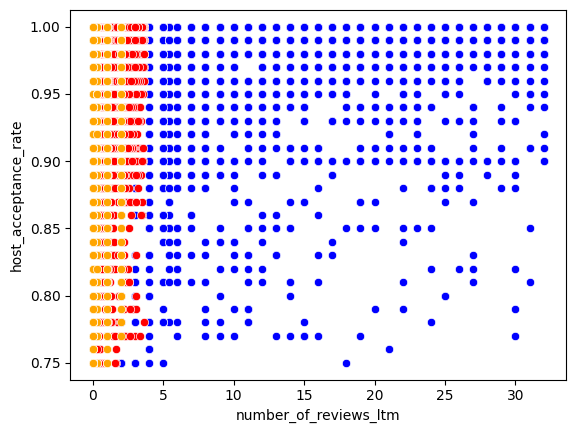

In [40]:
from turtle import color

sns.scatterplot(x='number_of_reviews_ltm', y='host_acceptance_rate', color="blue", data=Naples1)
sns.scatterplot(x='reviews_per_month', y='host_acceptance_rate', color="red", data=Naples1)
sns.scatterplot(x='number_of_reviews_l30d', y='host_acceptance_rate', color="orange", data=Naples1)

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples1[['number_of_reviews_ltm', 'reviews_per_month','number_of_reviews_l30d']]
Var_Dep= Naples1['host_acceptance_rate']

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'reviews_per_month',
        'number_of_reviews_l30d'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.0008154 , 0.00124227, 0.00551469]),
 'rank_': 3,
 'singular_': array([808.55278491,  70.7863097 ,  51.10888275]),
 'intercept_': 0.9621987195313894}

Modelo matematico y = 0.0008154 + 0.00124227 + 0.00551469 + 0.9621987195313894


In [43]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.029800155825486008

In [44]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples1[['number_of_reviews_ltm', 'reviews_per_month', 'number_of_reviews_l30d']])
y_pred

array([0.96242233, 0.96233537, 0.98599216, ..., 0.96331677, 0.96331677,
       0.96331677])

In [45]:
#Insertamos la columna de predicciones en el DataFrame
Naples1.insert(26, 'Predicciones', y_pred)
Naples1

,last_scraped,name,description,neighborhood_overview,picture_url,host_name,host_since,host_about,host_response_time,host_is_superhost,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17/09/2024,Naturists rooms in the heart of city,Right in the heart of Napoli you can walk any...,"close to 2 underground lines, next to bus stop...",https://a0.muscache.com/pictures/miso/Hosting-...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,f,...,0.0,0.0,4.67,4.67,5.00,4.67,5.00,5.00,4.67,0.18
1,17/09/2024,cosy room to let in naples,Oriental decorated apartment with wonderful te...,"Centrally located,close to public transport, i...",https://a0.muscache.com/pictures/171280/92fe69...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,f,...,0.0,0.0,4.74,4.83,4.72,4.83,4.78,4.44,4.56,0.11
2,17/09/2024,Charming Room on Riviera di Chiaia,Centrally located and at walking distance to t...,The house is located in a lively and popular n...,https://a0.muscache.com/pictures/389538/99361e...,Paola,04/12/2010,Le Stanze dei Pollano - this is our website,within a few hours,f,...,21.0,1.0,4.65,4.78,4.50,4.92,4.82,4.73,4.68,0.93
3,17/09/2024,Cozy place in a princely Palace inside Old Town,A really cozy studio (24 square meters) in a p...,The flat is in the OLD TOWN od Napoli with 2 m...,https://a0.muscache.com/pictures/c8a48f3d-1be3...,Davide,17/11/2010,"Architecture, art, archeology, good food.",within an hour,Sin especificar,...,29.0,2.0,4.89,4.88,4.92,4.96,4.97,4.84,4.89,1.68
4,17/09/2024,"Central Cebollitas B&B, spacious private ensuite.","A bright, sunny home in vomero area (on a hill...","La casa di Cebollitas si trova a Napoli, Campa...",https://a0.muscache.com/pictures/miso/Hosting-...,Cebollitas,26/02/2011,Cebollitas is a homely modern b&b situated in...,within an hour,t,...,31.0,0.3,4.97,4.90,4.94,4.90,4.98,4.92,4.94,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11022,17/09/2024,Domus Parthenope Confort,Relax in this peaceful and centrally-located p...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Gianpiero,30/10/2023,Sin especificar,within an hour,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11023,17/09/2024,Casetta lulÃ¹,Your family will be close to everything when y...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Luisa,11/09/2024,Sin especificar,Sin especificar,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11024,17/09/2024,"TATTINELLAâs, hidden gem in the heart of Naples","Located in the beating heart of the city, our ...",Sin especificar,https://a0.muscache.com/pictures/miso/Hosting-...,Simona,28/12/2023,"Ciao, noi siamo Simona&Valentina, sorelle molt...",within an hour,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11025,17/09/2024,Irmaâs House casa vacanze,Relax with the whole family at this peaceful a...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Jari,09/11/2014,Sin especificar,Sin especificar,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90


<Axes: xlabel='reviews_per_month', ylabel='host_acceptance_rate'>

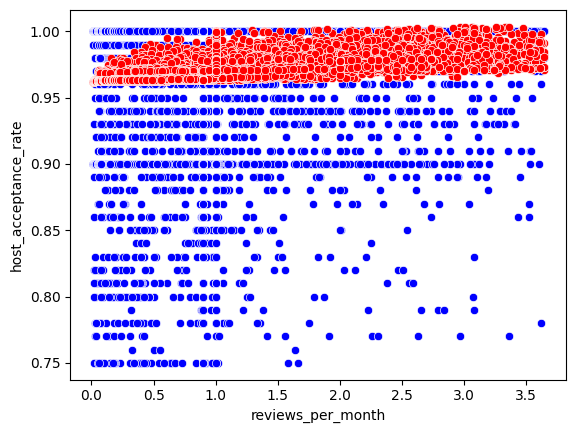

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='reviews_per_month', y='host_acceptance_rate', color="blue", data=Naples1)
sns.scatterplot(x='reviews_per_month', y='Predicciones', color="red", data=Naples1)
# sns.lineplot(x='reviews_per_month', y='Predicciones', color="green", data=Naples1)

In [47]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.029800155825486008

In [48]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.17262721635213263

3. host_is_superhost

In [51]:
# Cargar archivo desde equipo
Naples2 = pd.read_csv("Datos_limpios_Naples.csv")
Naples2 = Naples2.drop(['Unnamed: 0'], axis=1)
# Naples2.info()

In [54]:
print(Naples2["host_is_superhost"].unique())

[0 1]


In [53]:
Naples2["host_is_superhost"] = Naples2["host_is_superhost"].replace({"t": 1, "f": 0})
Naples2["host_is_superhost"] = Naples2["host_is_superhost"].replace({"Sin especificar": 0})

C:\Users\Bondleton\AppData\Local\Temp\ipykernel_4160\3156911310.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples2["host_is_superhost"] = Naples2["host_is_superhost"].replace({"Sin especificar": 0})


<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

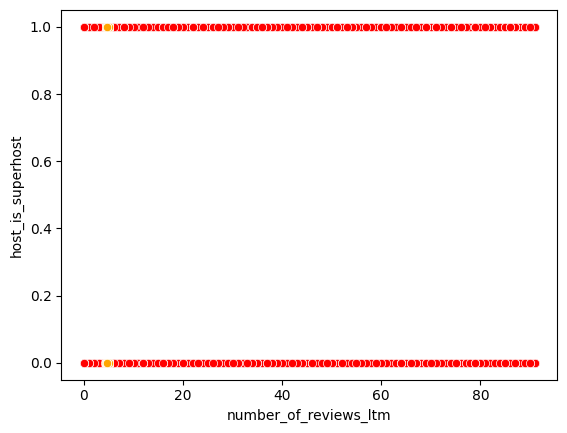

In [55]:
from turtle import color

sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=Naples2)
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="red", data=Naples2)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="orange", data=Naples2)


In [56]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples2[['number_of_reviews_ltm', 'number_of_reviews','review_scores_rating']]
Var_Dep= Naples2['host_is_superhost']

In [57]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.01593712, 0.00419551, 0.73711935]),
 'rank_': 3,
 'singular_': array([2100.33473146,  697.38349585,   16.14434133]),
 'intercept_': -3.427202776948992}

Modelo matematico y = 0.01593712 + 0.00419551 + 0.73711935 + (-3.427202776948992)

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

In [58]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples2[['number_of_reviews_ltm', 'number_of_reviews','review_scores_rating']])
y_pred

array([0.02773112, 0.15065308, 0.39549711, ..., 0.03725819, 0.03725819,
       0.03725819])

In [59]:
#Insertamos la columna de predicciones en el DataFrame
Naples2.insert(9, 'Predicciones', y_pred)
Naples2

,last_scraped,name,description,neighborhood_overview,picture_url,host_name,host_since,host_about,host_response_time,Predicciones,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17/09/2024,Naturists rooms in the heart of city,Right in the heart of Napoli you can walk any...,"close to 2 underground lines, next to bus stop...",https://a0.muscache.com/pictures/miso/Hosting-...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,0.027731,...,0.0,0.0,4.67,4.67,5.00,4.67,5.00,5.00,4.67,0.18
1,17/09/2024,cosy room to let in naples,Oriental decorated apartment with wonderful te...,"Centrally located,close to public transport, i...",https://a0.muscache.com/pictures/171280/92fe69...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,0.150653,...,0.0,0.0,4.74,4.83,4.72,4.83,4.78,4.44,4.56,0.11
2,17/09/2024,Charming Room on Riviera di Chiaia,Centrally located and at walking distance to t...,The house is located in a lively and popular n...,https://a0.muscache.com/pictures/389538/99361e...,Paola,04/12/2010,Le Stanze dei Pollano - this is our website,within a few hours,0.395497,...,21.0,1.0,4.65,4.78,4.50,4.92,4.82,4.73,4.68,0.93
3,17/09/2024,Cozy place in a princely Palace inside Old Town,A really cozy studio (24 square meters) in a p...,The flat is in the OLD TOWN od Napoli with 2 m...,https://a0.muscache.com/pictures/c8a48f3d-1be3...,Davide,17/11/2010,"Architecture, art, archeology, good food.",within an hour,0.699903,...,29.0,2.0,4.89,4.88,4.92,4.96,4.97,4.84,4.89,1.68
4,17/09/2024,"Central Cebollitas B&B, spacious private ensuite.","A bright, sunny home in vomero area (on a hill...","La casa di Cebollitas si trova a Napoli, Campa...",https://a0.muscache.com/pictures/miso/Hosting-...,Cebollitas,26/02/2011,Cebollitas is a homely modern b&b situated in...,within an hour,0.994648,...,31.0,0.3,4.97,4.90,4.94,4.90,4.98,4.92,4.94,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11022,17/09/2024,Domus Parthenope Confort,Relax in this peaceful and centrally-located p...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Gianpiero,30/10/2023,Sin especificar,within an hour,0.037258,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11023,17/09/2024,Casetta lulÃ¹,Your family will be close to everything when y...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Luisa,11/09/2024,Sin especificar,Sin especificar,0.037258,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11024,17/09/2024,"TATTINELLAâs, hidden gem in the heart of Naples","Located in the beating heart of the city, our ...",Sin especificar,https://a0.muscache.com/pictures/miso/Hosting-...,Simona,28/12/2023,"Ciao, noi siamo Simona&Valentina, sorelle molt...",within an hour,0.037258,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11025,17/09/2024,Irmaâs House casa vacanze,Relax with the whole family at this peaceful a...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Jari,09/11/2014,Sin especificar,Sin especificar,0.037258,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90


<Axes: xlabel='number_of_reviews', ylabel='host_is_superhost'>

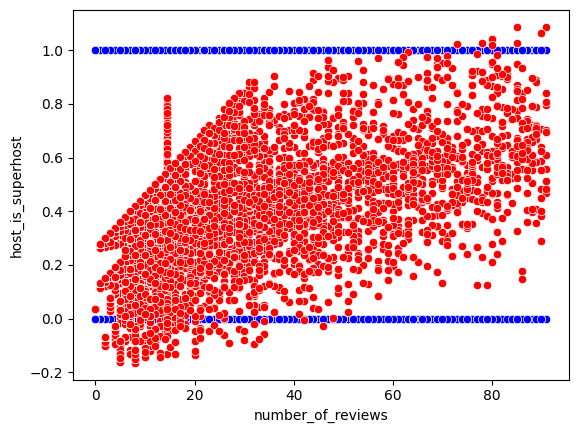

In [60]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="blue", data=Naples2)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=Naples2)
# sns.lineplot(x='number_of_reviews', y='Predicciones', color="green", data=Naples1)

In [61]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.23536947253374796

In [62]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4851489178940297

4. host_total_listings_count

In [ ]:
# Cargar archivo desde equipo
Naples3 = pd.read_csv("Datos_limpios_Naples.csv")
Naples3 = Naples3.drop(['Unnamed: 0'], axis=1)
# Naples3.info()

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

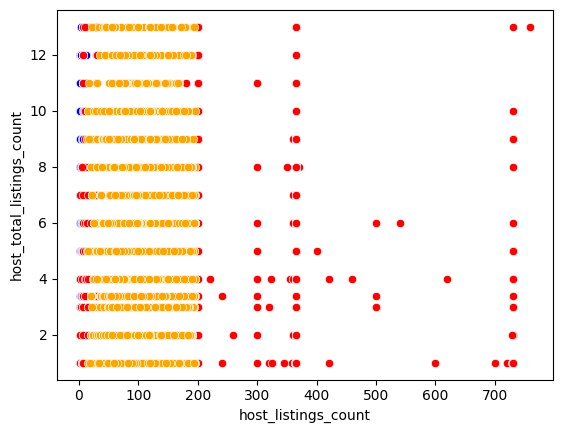

In [75]:
from turtle import color

sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=Naples3)
sns.scatterplot(x='maximum_nights', y='host_total_listings_count', color="red", data=Naples3)
sns.scatterplot(x='price', y='host_total_listings_count', color="orange", data=Naples3)


In [76]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples3[['host_listings_count', 'maximum_nights','price']]
Var_Dep= Naples3['host_total_listings_count']

In [77]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'maximum_nights', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.00678727e+00,  2.22279251e-04, -9.74258884e-04]),
 'rank_': 3,
 'singular_': array([16365.60528727,  3456.20710245,   224.45976926]),
 'intercept_': 0.4604109615460197}

Modelo matematico y = 1.00678727e+00 + 2.22279251e-04 + -9.74258884e-04 + 0.4604109615460197

In [78]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7608656702380868

In [79]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples3[['host_listings_count', 'maximum_nights','price']])
y_pred

array([8.48554701, 8.44733383, 1.41428538, ..., 1.39255856, 1.49084888,
       1.5307935 ])

In [80]:
#Insertamos la columna de predicciones en el DataFrame
Naples3.insert(28, 'Predicciones', y_pred)
# Naples3

<Axes: xlabel='maximum_nights', ylabel='host_total_listings_count'>

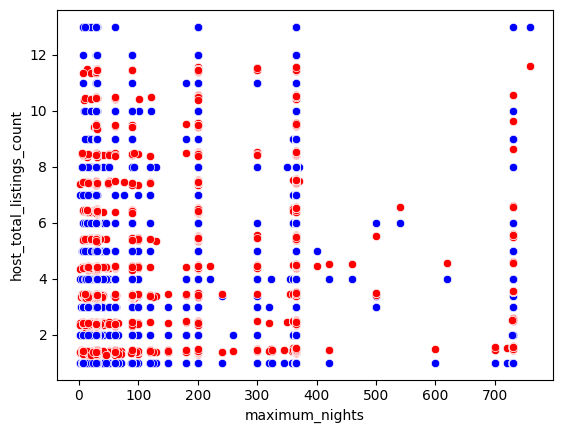

In [71]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='maximum_nights', y='host_total_listings_count', color="blue", data=Naples3)
sns.scatterplot(x='maximum_nights', y='Predicciones', color="red", data=Naples3)
# sns.lineplot(x='maximum_nights', y='Predicciones', color="green", data=Naples1)

In [81]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7608656702380868

In [82]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8722761433388436

5. accommodates


In [114]:
# Cargar archivo desde equipo
Naples4 = pd.read_csv("Datos_limpios_Naples.csv")
Naples4 = Naples4.drop(['Unnamed: 0'], axis=1)
# Naples4.info()

<Axes: xlabel='beds', ylabel='accommodates'>

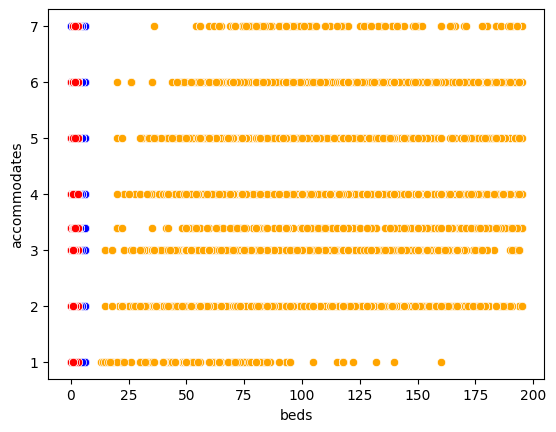

In [115]:
from turtle import color

sns.scatterplot(x='beds', y='accommodates', color="blue", data=Naples4)
sns.scatterplot(x='bedrooms', y='accommodates', color="red", data=Naples4)
sns.scatterplot(x='price', y='accommodates', color="orange", data=Naples4)

In [116]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples4[['beds', 'bedrooms','price']]
Var_Dep= Naples4['accommodates']

In [117]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'bedrooms', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.49904434, 0.63714065, 0.00411386]),
 'rank_': 3,
 'singular_': array([3459.99040496,  124.63574272,   50.97683396]),
 'intercept_': 1.182195848101216}

Modelo matematico y = 0.49904434, 0.63714065, 0.00411386 + 1.182195848101216

In [118]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.41568552583902185

In [120]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples4[['beds', 'bedrooms','price']])
y_pred

array([2.61046509, 2.6310344 , 2.5981235 , ..., 4.29506077, 4.33442437,
       2.39243036])

In [121]:
#Insertamos la columna de predicciones en el DataFrame
Naples4.insert(29, 'Predicciones', y_pred)
# Naples4

<Axes: xlabel='bedrooms', ylabel='accommodates'>

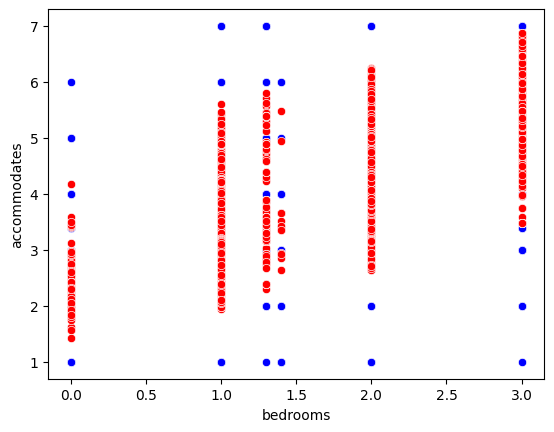

In [122]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=Naples4)
sns.scatterplot(x='bedrooms', y='Predicciones', color="red", data=Naples4)
# sns.lineplot(x='bedrooms', y='Predicciones', color="green", data=Naples1)

In [123]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.41568552583902185

In [124]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6447367880298299

6. bedrooms

In [153]:
# Cargar archivo desde equipo
Naples5 = pd.read_csv("Datos_limpios_Naples.csv")
Naples5 = Naples5.drop(['Unnamed: 0'], axis=1)
# Naples5.info()

<Axes: xlabel='accommodates', ylabel='bedrooms'>

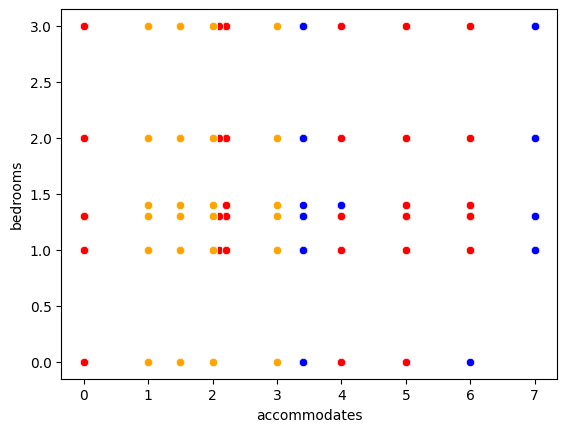

In [154]:
from turtle import color

sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=Naples5)
sns.scatterplot(x='beds', y='bedrooms', color="red", data=Naples5)
sns.scatterplot(x='minimum_nights', y='bedrooms', color="orange", data=Naples5)


In [155]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples5[['accommodates', 'beds','minimum_nights']]
Var_Dep= Naples5['accommodates']

In [156]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'minimum_nights'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.00000000e+00, 1.68773364e-16, 1.75012256e-16]),
 'rank_': 3,
 'singular_': array([168.73588112,  84.3350601 ,  66.02393425]),
 'intercept_': 2.842170943040401e-14}

Modelo matematico y = 1.00000000e+00, 1.68773364e-16, 1.75012256e-16 + 2.842170943040401e-14

In [157]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

1.0

In [158]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples5[['accommodates', 'beds','minimum_nights']])
y_pred

array([2., 1., 2., ..., 6., 4., 2.])

In [159]:
#Insertamos la columna de predicciones en el DataFrame
Naples5.insert(31, 'Predicciones', y_pred)
# Naples5

<Axes: xlabel='beds', ylabel='bedrooms'>

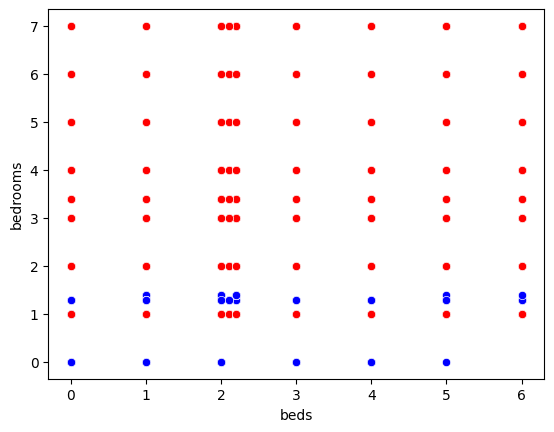

In [160]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='beds', y='bedrooms', color="blue", data=Naples5)
sns.scatterplot(x='beds', y='Predicciones', color="red", data=Naples5)
# sns.lineplot(x='beds', y='Predicciones', color="green", data=Naples1)

In [161]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

1.0

In [162]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

1.0

7. Price

In [163]:
# Cargar archivo desde equipo
Naples6 = pd.read_csv("Datos_limpios_Naples.csv")
Naples6 = Naples6.drop(['Unnamed: 0'], axis=1)
# Naples6.info()

<Axes: xlabel='bedrooms', ylabel='price'>

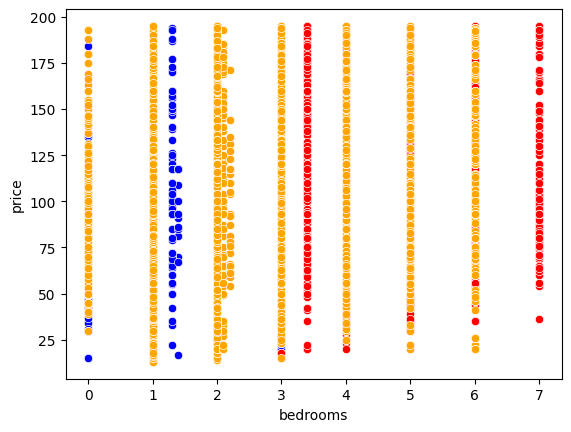

In [164]:
from turtle import color

sns.scatterplot(x='bedrooms', y='price', color="blue", data=Naples6)
sns.scatterplot(x='accommodates', y='price', color="red", data=Naples6)
sns.scatterplot(x='beds', y='price', color="orange", data=Naples6)

In [165]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples6[['bedrooms', 'accommodates','beds']]
Var_Dep= Naples6['price']

In [166]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'accommodates', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([7.54020402, 3.80316189, 0.44639698]),
 'rank_': 3,
 'singular_': array([172.6286859 ,  84.44852236,  49.59499312]),
 'intercept_': 69.4891845931024}

Modleo matematico y = 7.54020402, 3.80316189, 0.44639698 + 69.4891845931024

In [167]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.07102688352161723

In [168]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples6[['bedrooms', 'accommodates','beds']])
y_pred

array([ 85.08210937,  81.27894748,  85.08210937, ..., 108.7277549 ,
       108.21523817,  85.08210937])

In [169]:
#Insertamos la columna de predicciones en el DataFrame
Naples6.insert(33, 'Predicciones', y_pred)
# Naples5

<Axes: xlabel='accommodates', ylabel='price'>

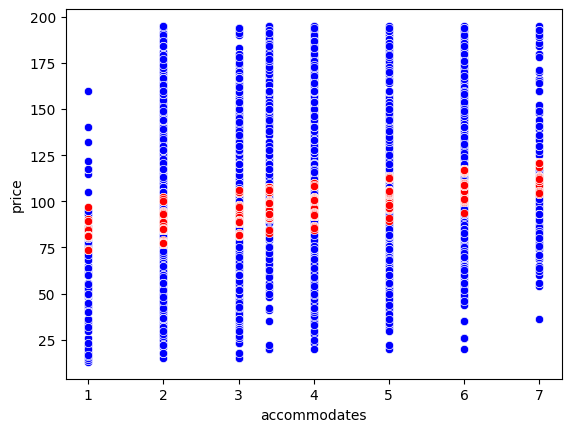

In [170]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='accommodates', y='price', color="blue", data=Naples6)
sns.scatterplot(x='accommodates', y='Predicciones', color="red", data=Naples6)
# sns.lineplot(x='accommodates', y='Predicciones', color="green", data=Naples6)

In [171]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.07102688352161723

In [172]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2665086931445525

8. review_scores_value

In [ ]:
# Cargar archivo desde equipo
Naples7 = pd.read_csv("Datos_limpios_Naples.csv")
Naples7 = Naples7.drop(['Unnamed: 0'], axis=1)
# Naples7.info()

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

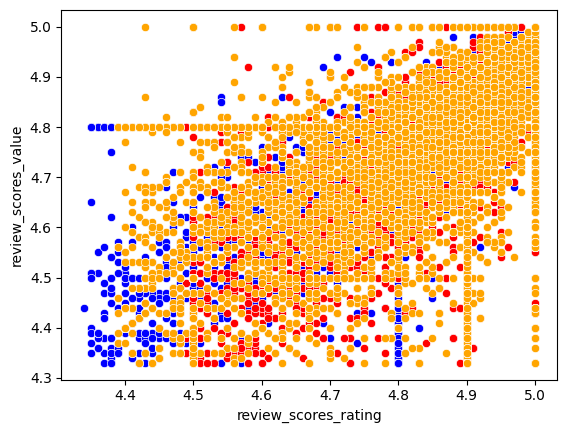

In [174]:
from turtle import color

sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=Naples7)
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="red", data=Naples7)
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="orange", data=Naples7)

In [176]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples7[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness']]
Var_Dep= Naples7['review_scores_value']

In [177]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.38372636, 0.33307199, 0.20116121]),
 'rank_': 3,
 'singular_': array([20.73385858, 10.7931984 ,  9.06317165]),
 'intercept_': 0.3460512529068893}

Modelo matematico y = 0.38372636, 0.33307199, 0.20116121 + 0.3460512529068893

In [178]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.49245582699653245

In [179]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples7[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness']])
y_pred

array([4.69930562, 4.72313284, 4.6276884 , ..., 4.76730784, 4.76730784,
       4.76730784])

In [180]:
#Insertamos la columna de predicciones en el DataFrame
Naples7.insert(48, 'Predicciones', y_pred)
# Naples7

<Axes: xlabel='review_scores_accuracy', ylabel='review_scores_value'>

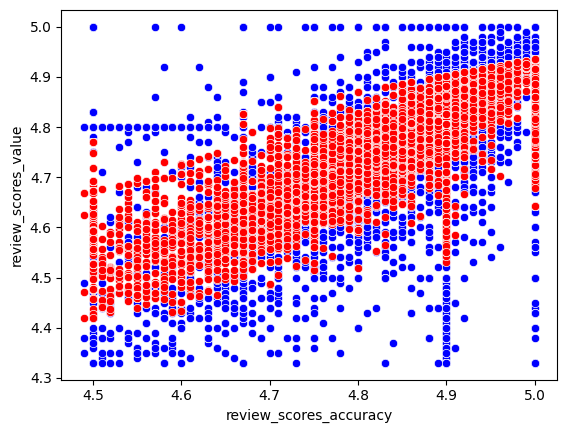

In [181]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="blue", data=Naples7)
sns.scatterplot(x='review_scores_accuracy', y='Predicciones', color="red", data=Naples7)
# sns.lineplot(x='review_scores_accuracy', y='Predicciones', color="green", data=Naples6)

In [182]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.49245582699653245

In [183]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7017519697133258

9. reviews_per_month

In [184]:
# Cargar archivo desde equipo
Naples8 = pd.read_csv("Datos_limpios_Naples.csv")
Naples8 = Naples8.drop(['Unnamed: 0'], axis=1)
# Naples8.info()

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

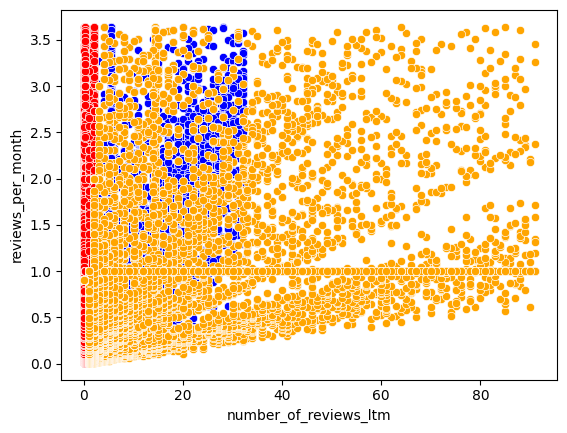

In [185]:
from turtle import color

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=Naples8)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="red", data=Naples8)
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="orange", data=Naples8)

In [186]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples8[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']]
Var_Dep= Naples8['reviews_per_month']

In [187]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.04827096, 0.28900529, 0.00265153]),
 'rank_': 3,
 'singular_': array([2100.40936886,  697.71589467,   54.56852714]),
 'intercept_': 0.6188999960004631}

Modelo 0.04827096, 0.28900529, 0.00265153 + 0.6188999960004631

In [188]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.3846881703478603

In [189]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples8[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']])
y_pred

array([0.62685459, 0.67193064, 1.95977759, ..., 0.6189    , 0.6189    ,
       0.6189    ])

In [190]:
#Insertamos la columna de predicciones en el DataFrame
Naples8.insert(49, 'Predicciones', y_pred)
# Naples8

<Axes: xlabel='number_of_reviews_l30d', ylabel='reviews_per_month'>

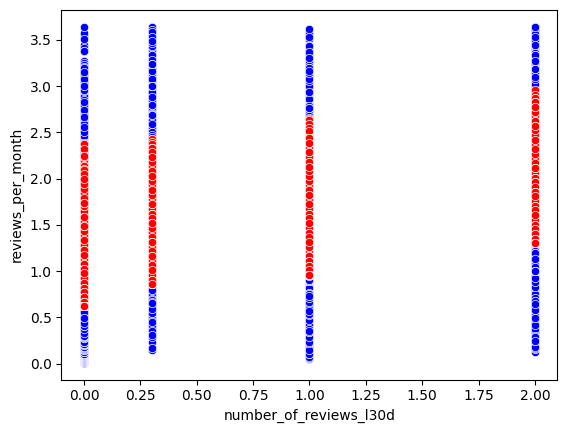

In [191]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="blue", data=Naples8)
sns.scatterplot(x='number_of_reviews_l30d', y='Predicciones', color="red", data=Naples8)
# sns.lineplot(x='number_of_reviews_l30d', y='Predicciones', color="green", data=Naples6)

In [192]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.3846881703478603

In [193]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6202323519035913

10. property_type

In [195]:
# Cargar archivo desde equipo
Naples9 = pd.read_csv("Datos_limpios_Naples.csv")
Naples9 = Naples9.drop(['Unnamed: 0'], axis=1)
# Naples9.info()

In [199]:
print(Naples9["property_type"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


In [198]:
Naples9["property_type"] = Naples9["property_type"].replace({
    "Private room in bed and breakfast": 1,
    "Private room in condo": 2,
    "Entire rental unit": 3,
    "Private room in rental unit": 4,
    "Entire loft": 5,
    "Entire cottage": 6,
    "Entire home": 7,
    "Room in bed and breakfast": 8,
    "Entire condo": 9,
    "Shared room in hostel": 10,
    "Room in boutique hotel": 11,
    "Entire vacation home": 12,
    "Entire villa": 13,
    "Private room in home": 14,
    "Entire serviced apartment": 15,
    "Entire townhouse": 16,
    "Private room in hostel": 17,
    "Private room": 18,
    "Entire bed and breakfast": 19,
    "Private room in villa": 20,
    "Entire guesthouse": 21,
    "Room in hostel": 22,
    "Boat": 23,
    "Tiny home": 24,
    "Dome": 25,
    "Room in hotel": 26,
    "Shared room in bed and breakfast": 27,
    "Entire guest suite": 28,
    "Room in serviced apartment": 29,
    "Private room in vacation home": 30,
    "Shared room in rental unit": 31,
    "Shared room in condo": 32,
    "Private room in serviced apartment": 33,
    "Entire place": 34,
    "Private room in guest suite": 35,
    "Private room in tiny home": 36,
    "Private room in townhouse": 37,
    "Private room in boat": 38,
    "Private room in loft": 39,
    "Earthen home": 40,
    "Dammuso": 41,
    "Shared room in home": 42,
    "Houseboat": 43,
    "Private room in guesthouse": 44,
    "Private room in casa particular": 45,
    "Camper/RV": 46,
    "Castle": 47,
    "Casa particular": 48,
    "Entire home/apt": 49,
    "Farm stay": 50,
    "Private room in farm stay": 51,
    "Room in aparthotel": 52,
    "Tent": 53
})

C:\Users\Bondleton\AppData\Local\Temp\ipykernel_4160\2954635686.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples9["property_type"] = Naples9["property_type"].replace({


<Axes: xlabel='accommodates', ylabel='property_type'>

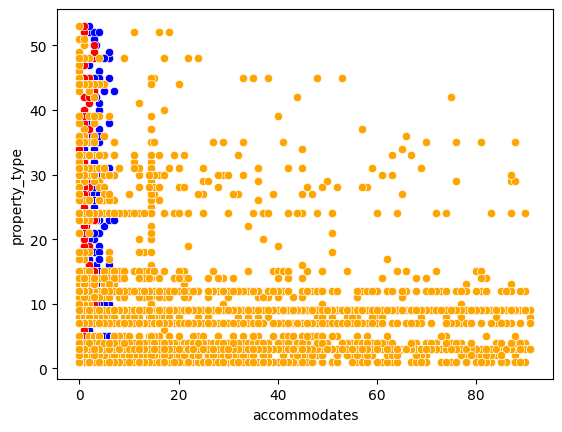

In [200]:
from turtle import color

sns.scatterplot(x='accommodates', y='property_type', color="blue", data=Naples9)
sns.scatterplot(x='bedrooms', y='property_type', color="red", data=Naples9)
sns.scatterplot(x='number_of_reviews', y='property_type', color="orange", data=Naples9)

In [201]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Naples9[['accommodates', 'bedrooms','number_of_reviews']]
Var_Dep= Naples9['property_type']

In [202]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.15416904, -0.19265567,  0.01381463]),
 'rank_': 3,
 'singular_': array([2060.90777609,  147.2482174 ,   51.91559997]),
 'intercept_': 6.548656837488827}

Modelo y = -0.15416904, -0.19265567,  0.01381463 + 6.548656837488827

In [203]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0031794670063459707

In [204]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Naples9[['accommodates', 'bedrooms','number_of_reviews']])
y_pred

array([6.08910698, 6.4781247 , 6.24659374, ..., 5.23833128, 5.35401368,
       6.04766309])

In [205]:
#Insertamos la columna de predicciones en el DataFrame
Naples9.insert(14, 'Predicciones', y_pred)
# Naples9

<Axes: xlabel='bedrooms', ylabel='property_type'>

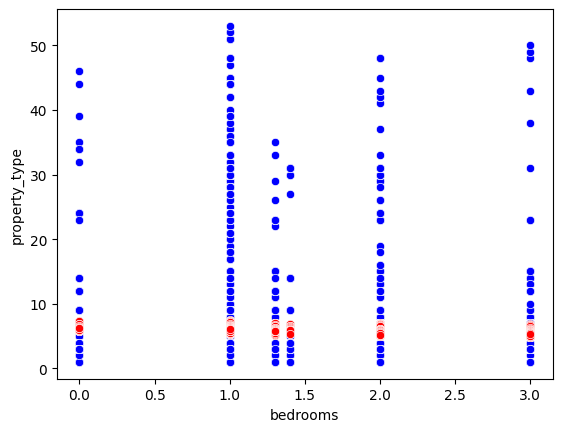

In [206]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='property_type', color="blue", data=Naples9)
sns.scatterplot(x='bedrooms', y='Predicciones', color="red", data=Naples9)
# sns.lineplot(x='bedrooms', y='Predicciones', color="green", data=Naples9)

In [207]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0031794670063459707

In [208]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0563867626872298